# 📊 S&P/TSX Composite Index Analysis & Investment Signal

Welcome to this comprehensive analysis of the **S&P/TSX Composite Index** constituents. This file walks through:

- 🌐 **Web Scraping & Data Extraction:**  
  Using Python libraries (`requests`, `BeautifulSoup`, and `pandas`), we extract and clean the latest constituent data directly from Wikipedia.

- 🧹 **Data Cleaning & Preparation:**  
  We process raw HTML tables into a clean, structured DataFrame ready for further financial analysis.

- 📈 **Valuation Integration:**  
  Combining this data with discounted cash flow (DCF) valuations and balance sheet adjustments, we compute fair equity values for key stocks.

- 🚦 **Buy Signals & Price Targets:**  
  Based on our valuation, current market prices, and risk-based upside targets, we generate actionable entry and exit signals for investors.

---

This structured approach ensures transparency, reproducibility, and actionable insights to support your investment decisions in the Canadian equity market.

---

Feel free to explore the code and results sections to understand the full workflow and rationale behind the final buy signals.


## 🏭 Sector & Industry Distribution Analysis of S&P/TSX Composite Index

To better understand the composition and risk exposures within the S&P/TSX Composite Index, we analyze the distribution of its constituent companies by **sector** and **industry**.

- 📊 **Industry Segmentation:**  
  By examining the relative weight (proportion) of companies across different sectors and industries, we gain insights into the index’s diversification and concentration risks.

- 🔍 **Why This Matters:**  
  Sector and industry breakdowns reveal where market capitalization and economic activity are focused — important for portfolio construction, risk management, and thematic investing.

- 📈 **Normalized Distribution:**  
  We use the normalized counts (proportions) of companies by `(Sector, Industry)` pairs to highlight the dominant segments and potential overweights or gaps in the index.

---

Below is the computed normalized distribution reflecting the relative presence of each industry within its sector in the index.


In [ ]:
import requests, pandas as pd
from bs4 import BeautifulSoup
from io import StringIO
import plotly.express as px
import yfinance as yf

url = "https://en.wikipedia.org/wiki/S%26P/TSX_Composite_Index"
soup = BeautifulSoup(requests.get(url, headers={"User-Agent":"Mozilla/5.0"}).text, "html.parser")
tables = soup.find_all("table", class_="wikitable")
if len(tables) >= 3:
    SP_TSX = pd.read_html(StringIO(str(tables[2])))[0]
    SP_TSX.columns = [c.replace(" [9]", "") for c in SP_TSX.columns]
    print("Cleaned Column Names:", SP_TSX.columns)
    print(SP_TSX.head())
else:
    print("The page does not contain at least three tables.")


Cleaned Column Names: Index(['Ticker', 'Company', 'Sector', 'Industry'], dtype='object')
  Ticker                     Company           Sector  \
0    AAV       Advantage Energy Ltd.           Energy   
1    AEM  Agnico Eagle Mines Limited  Basic Materials   
2     AC                  Air Canada      Industrials   
3    AGI            Alamos Gold Inc.  Basic Materials   
4   ASTL     Algoma Steel Group Inc.  Basic Materials   

                               Industry  
0  Oil & Gas Exploration and Production  
1                       Metals & Mining  
2                        Transportation  
3                       Metals & Mining  
4                                 Steel  


In [3]:
SECTOR_DISTRIBUTION=SP_TSX['Sector'].value_counts(normalize=True)
SECTOR_DISTRIBUTION


Sector
Basic Materials           0.219731
Energy                    0.201794
Financial Services        0.116592
Industrials               0.112108
Real Estate               0.094170
Consumer Cyclical         0.076233
Information Technology    0.049327
Consumer Staples          0.049327
Utilities                 0.044843
Communication Services    0.022422
Healthcare                0.013453
Name: proportion, dtype: float64

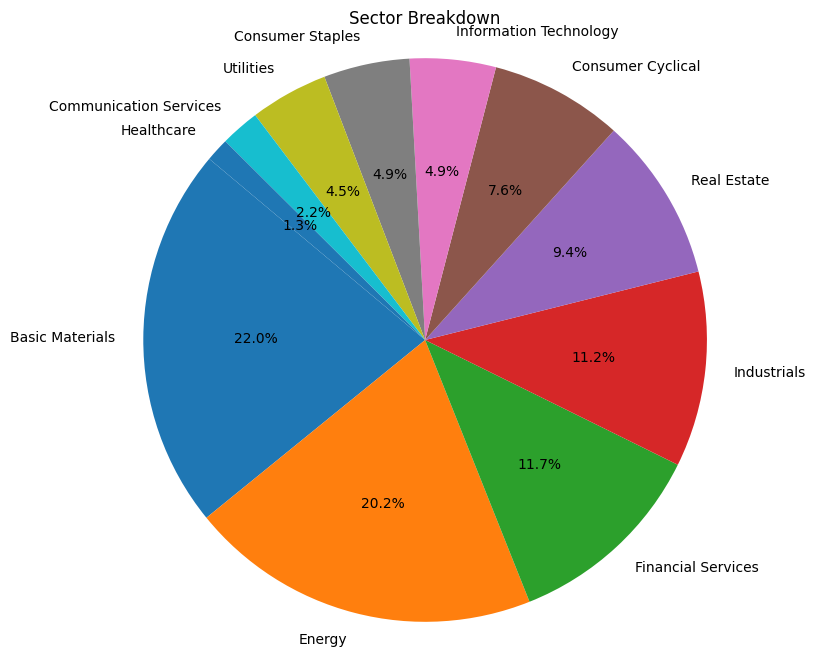

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(SECTOR_DISTRIBUTION.values, labels=SECTOR_DISTRIBUTION.index, autopct='%1.1f%%', startangle=140)
plt.title("Sector Breakdown")
plt.axis('equal')
plt.show()


In [5]:
INDUSTRY_DISTRIBUTION=SP_TSX[['Sector','Industry']].value_counts(normalize=True)
INDUSTRY_DISTRIBUTION

Sector                  Industry                            
Basic Materials         Metals & Mining                         0.183857
Energy                  Oil & Gas Exploration and Production    0.094170
Real Estate             REITs                                   0.071749
Information Technology  Software                                0.044843
Financial Services      Insurance                               0.040359
                        Banks                                   0.040359
Utilities               Regulated Utilities                     0.035874
Industrials             Transportation                          0.031390
Energy                  Oil & Gas Storage/Transport             0.031390
Consumer Staples        Retailers - Staples                     0.026906
Financial Services      Asset Management                        0.026906
Real Estate             Real Estate                             0.022422
Communication Services  Telecommunication Services             

In [10]:
# Reset index and rename the values column properly
df_dist = INDUSTRY_DISTRIBUTION.reset_index()
df_dist = df_dist.rename(columns={0: 'proportion'})

# Now plot pie charts faceted by Sector, showing Industry proportions
fig = px.pie(
    df_dist,
    values='proportion',
    names='Industry',
    title='Industry Distribution by Sector',
    facet_col='Sector',
    facet_col_wrap=3,
    height=800,
    width=1300
)
fig.show()

## 🔄 Adjusting Tickers for Yahoo Finance Compatibility

When retrieving stock data from the **Toronto Stock Exchange (TSX)**, tickers often need to be modified to match Yahoo Finance's naming conventions.

- 🎯 **Goal:**  
  Append `.TO` to each ticker symbol to accurately query Yahoo Finance for TSX-listed companies.

- 🔧 **Why:**  
  Yahoo Finance uses suffixes like `.TO` to distinguish exchange listings, ensuring you retrieve the correct market data.

- 🗂️ **Example:**  
  A stock ticker like `BNS` (Bank of Nova Scotia) becomes `BNS.TO` for proper data access.

---

This simple adjustment is crucial for seamless data fetching, analysis, and integration with financial APIs.


In [11]:
SP_TSX['Ticker'] = SP_TSX['Ticker'] + '.TO'

In [14]:
tickers = SP_TSX['Ticker'].tolist()  # Convert the Series to a list
tickers = SP_TSX['Ticker'].dropna().astype(str).tolist()  # Remove NaN and convert to strings

data = yf.download(tickers, period='1y', auto_adjust=False)[['Adj Close', 'Volume']]


[****                   9%                       ]  21 of 222 completedHTTP Error 404: 
[*********************100%***********************]  222 of 222 completed

37 Failed downloads:
['TCL.A.TO', 'CRT.UN.TO', 'VRN.TO', 'FCR.UN.TO', 'EMP.A.TO', 'DIR.UN.TO', 'PMZ.UN.TO', 'AP.UN.TO', 'HR.UN.TO', 'CWB.TO', 'BIP.UN.TO', 'BEP.UN.TO', 'OSK.TO', 'QBR.B.TO', 'KMP.UN.TO', 'NWH.UN.TO', 'IIP.UN.TO', 'REI.UN.TO', 'SRU.UN.TO', 'CHP.UN.TO', 'GRT.UN.TO', 'ACO.X.TO', 'CAR.UN.TO', 'CTC.A.TO', 'TECK.B.TO', 'BBU.UN.TO', 'CSH.UN.TO', 'GIB.A.TO', 'CCL.B.TO', 'RCI.B.TO', 'BBD.B.TO', 'CRR.UN.TO', 'SIL.TO', 'BEI.UN.TO', 'NVEI.TO', 'FIL.TO', 'STLC.TO']: YFPricesMissingError('possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")')


In [15]:
data

Price      Adj Close                                                        \
Ticker        AAV.TO     ABX.TO      AC.TO ACO.X.TO      AEM.TO      AG.TO   
Date                                                                         
2024-08-06      9.00  23.573843  15.140000      NaN  101.827759   6.846950   
2024-08-07      8.94  22.747381  14.930000      NaN   97.971619   6.607755   
2024-08-08      8.93  23.426262  15.340000      NaN   99.638329   6.747286   
2024-08-09      8.85  23.524649  15.620000      NaN  100.456909   6.866882   
2024-08-12      9.54  25.728548  15.030000      NaN  103.997452   7.096111   
...              ...        ...        ...      ...         ...        ...   
2025-07-29     11.18  29.620001  19.340000      NaN  173.830002  11.570000   
2025-07-30     11.10  29.190001  19.670000      NaN  170.699997  11.180000   
2025-07-31     11.05  29.250000  19.299999      NaN  172.009995  11.020000   
2025-08-01     11.03  29.469999  19.059999      NaN  172.740005  10.820000   
2025-08-05     10.99  31.059999  18.889999      NaN  185.419998  11.520000   

Price                                                 ... Volume          \
Ticker         AGI.TO     AIF.TO     ALA.TO AP.UN.TO  ... VRN.TO  WCN.TO   
Date                                                  ...                  
2024-08-06  23.602690  54.356937  31.566973      NaN  ...    NaN  511000   
2024-08-07  22.806311  53.229649  31.257679      NaN  ...    NaN  341600   
2024-08-08  23.533009  54.287720  31.537977      NaN  ...    NaN  231500   
2024-08-09  23.742058  50.431210  31.934254      NaN  ...    NaN  333900   
2024-08-12  24.737532  49.986225  32.079235      NaN  ...    NaN  179100   
...               ...        ...        ...      ...  ...    ...     ...   
2025-07-29  35.419998  57.080002  40.650002      NaN  ...    NaN  507100   
2025-07-30  35.130001  57.419998  40.990002      NaN  ...    NaN  365000   
2025-07-31  33.669998  57.860001  40.910000      NaN  ...    NaN  410500   
2025-08-01  34.240002  58.049999  41.279999      NaN  ...    NaN  497900   
2025-08-05  36.160000  58.049999  40.799999      NaN  ...    NaN  319414   

Price                                                                        
Ticker       WCP.TO  WDO.TO  WFG.TO   WN.TO WPK.TO   WPM.TO  WSP.TO    X.TO  
Date                                                                         
2024-08-06  1997800  398400  202200  173600  36500  1159900  208800  913500  
2024-08-07  1769000  270000  196400  106200  20300  1119400  291300  313100  
2024-08-08  1130800  260800  108700  102700  10500   555800  216200  357600  
2024-08-09  1298500  304500   72900   81900  22600   544300  171600  240500  
2024-08-12  2054500  503700   89400   91300  18400   983100  208800  404300  
...             ...     ...     ...     ...    ...      ...     ...     ...  
2025-07-29  4234800  455900  279700  118600  78000   434900  114300  265300  
2025-07-30  5880700  457900  209400  122900  84700   482300  157000  258500  
2025-07-31  4665900  625800  242000  147400  87000   823700  187600  696000  
2025-08-01  6908000  621400  267300  117900  55700   613300  201400  249300  
2025-08-05  5286001  992806  303854  124577  78436   978164  218233  716401  

[251 rows x 444 columns]

In [16]:
cleaned_data = data.dropna(axis=1)
print(cleaned_data)

Price      Adj Close                                                          \
Ticker        AAV.TO     ABX.TO      AC.TO      AEM.TO      AG.TO     AGI.TO   
Date                                                                           
2024-08-06      9.00  23.573843  15.140000  101.827759   6.846950  23.602690   
2024-08-07      8.94  22.747381  14.930000   97.971619   6.607755  22.806311   
2024-08-08      8.93  23.426262  15.340000   99.638329   6.747286  23.533009   
2024-08-09      8.85  23.524649  15.620000  100.456909   6.866882  23.742058   
2024-08-12      9.54  25.728548  15.030000  103.997452   7.096111  24.737532   
...              ...        ...        ...         ...        ...        ...   
2025-07-29     11.18  29.620001  19.340000  173.830002  11.570000  35.419998   
2025-07-30     11.10  29.190001  19.670000  170.699997  11.180000  35.130001   
2025-07-31     11.05  29.250000  19.299999  172.009995  11.020000  33.669998   
2025-08-01     11.03  29.469999  19.0599

In [17]:
df = cleaned_data['Adj Close']
df


Ticker,AAV.TO,ABX.TO,AC.TO,AEM.TO,AG.TO,AGI.TO,AIF.TO,ALA.TO,AQN.TO,ARX.TO,...,VET.TO,WCN.TO,WCP.TO,WDO.TO,WFG.TO,WN.TO,WPK.TO,WPM.TO,WSP.TO,X.TO
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-06,9.00,23.573843,15.140000,101.827759,6.846950,23.602690,54.356937,31.566973,8.041601,22.539557,...,12.533092,243.251740,9.159359,12.910000,116.175323,204.552917,42.734997,75.173836,212.966980,40.152885
2024-08-07,8.94,22.747381,14.930000,97.971619,6.607755,22.806311,53.229649,31.257679,7.937042,22.354885,...,12.628912,245.155151,9.150087,12.290000,113.723824,202.718719,42.268559,72.909988,210.491776,40.703739
2024-08-08,8.93,23.426262,15.340000,99.638329,6.747286,23.533009,54.287720,31.537977,8.070117,22.801983,...,13.069678,245.791931,9.187171,12.620000,114.816666,204.621948,42.287216,74.121353,213.662827,40.959492
2024-08-09,8.85,23.524649,15.620000,100.456909,6.866882,23.742058,50.431210,31.934254,7.053036,22.850580,...,13.040932,246.378983,9.261334,13.040000,115.417229,204.296524,43.052177,76.107185,210.730377,41.087368
2024-08-12,9.54,25.728548,15.030000,103.997452,7.096111,24.737532,49.986225,32.079235,6.720345,24.143274,...,13.472116,246.110336,9.502371,14.000000,115.308929,205.598221,42.595066,78.053299,211.127975,41.018513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-29,11.18,29.620001,19.340000,173.830002,11.570000,35.419998,57.080002,40.650002,8.180000,27.870001,...,11.810000,264.239990,10.678886,17.230000,98.360001,268.339996,40.880001,128.600006,287.049988,56.790001
2025-07-30,11.10,29.190001,19.670000,170.699997,11.180000,35.130001,57.419998,40.990002,8.250000,27.770000,...,11.600000,261.920013,10.659000,16.680000,96.239998,263.000000,40.830002,125.919998,285.420013,56.230000
2025-07-31,11.05,29.250000,19.299999,172.009995,11.020000,33.669998,57.860001,40.910000,8.170000,27.049999,...,11.370000,258.739990,10.460000,16.500000,96.059998,263.290009,40.939999,126.720001,285.299988,56.340000


In [18]:
df_long = df.melt(ignore_index=False, value_name='Adj Close')
df_long

,Ticker,Adj Close
Date,,
2024-08-06,AAV.TO,9.000000
2024-08-07,AAV.TO,8.940000
2024-08-08,AAV.TO,8.930000
2024-08-09,AAV.TO,8.850000
2024-08-12,AAV.TO,9.540000
...,...,...
2025-07-29,X.TO,56.790001
2025-07-30,X.TO,56.230000
2025-07-31,X.TO,56.340000


In [19]:
df_long = df_long.reset_index().merge(SP_TSX[['Ticker', 'Sector', 'Industry']], left_on='Ticker', right_on='Ticker')
df_long

,Date,Ticker,Adj Close,Sector,Industry
0,2024-08-06,AAV.TO,9.000000,Energy,Oil & Gas Exploration and Production
1,2024-08-07,AAV.TO,8.940000,Energy,Oil & Gas Exploration and Production
2,2024-08-08,AAV.TO,8.930000,Energy,Oil & Gas Exploration and Production
3,2024-08-09,AAV.TO,8.850000,Energy,Oil & Gas Exploration and Production
4,2024-08-12,AAV.TO,9.540000,Energy,Oil & Gas Exploration and Production
...,...,...,...,...,...
45426,2025-07-29,X.TO,56.790001,Financial Services,Capital Markets
45427,2025-07-30,X.TO,56.230000,Financial Services,Capital Markets
45428,2025-07-31,X.TO,56.340000,Financial Services,Capital Markets
45429,2025-08-01,X.TO,55.830002,Financial Services,Capital Markets


## 📅 Year-to-Date (YTD) Performance Analysis by Sector and Industry

### 🔍 Overview
This section analyzes how stocks within the S&P/TSX Composite Index have performed **year-to-date** by calculating the percentage price change from the start to the latest date of the year for each company.

---

### ⚙️ Methodology
- We determine the **starting price** and **most recent price** for each stock in the current year.  
- The **YTD percentage change** is calculated to measure how much each stock’s price has increased or decreased.  
- This data is combined with sector and industry classifications to understand group-level performance.

---

### 📊 Visual Insights
- **Average YTD performance is displayed for each sector and industry**, helping to highlight which areas of the market are leading or lagging.  
- Bar charts ordered by ascending performance make it easy to spot the best- and worst-performing segments.

---

### ⚠️ Important Considerations
- **Sample Size:** Some sectors or industries may have only a few companies, so averages can be less reliable.  
- **Outliers:** Exceptional performers can skew the average, either positively or negatively.  
- **Data Coverage:** The dataset might not include every company, which can affect accuracy.

For a comprehensive understanding, it is advisable to corroborate these findings with other datasets containing larger and more complete samples.

---

This analysis provides valuable context for portfolio diversification, risk assessment, and identifying sector or industry trends within the Canadian market.


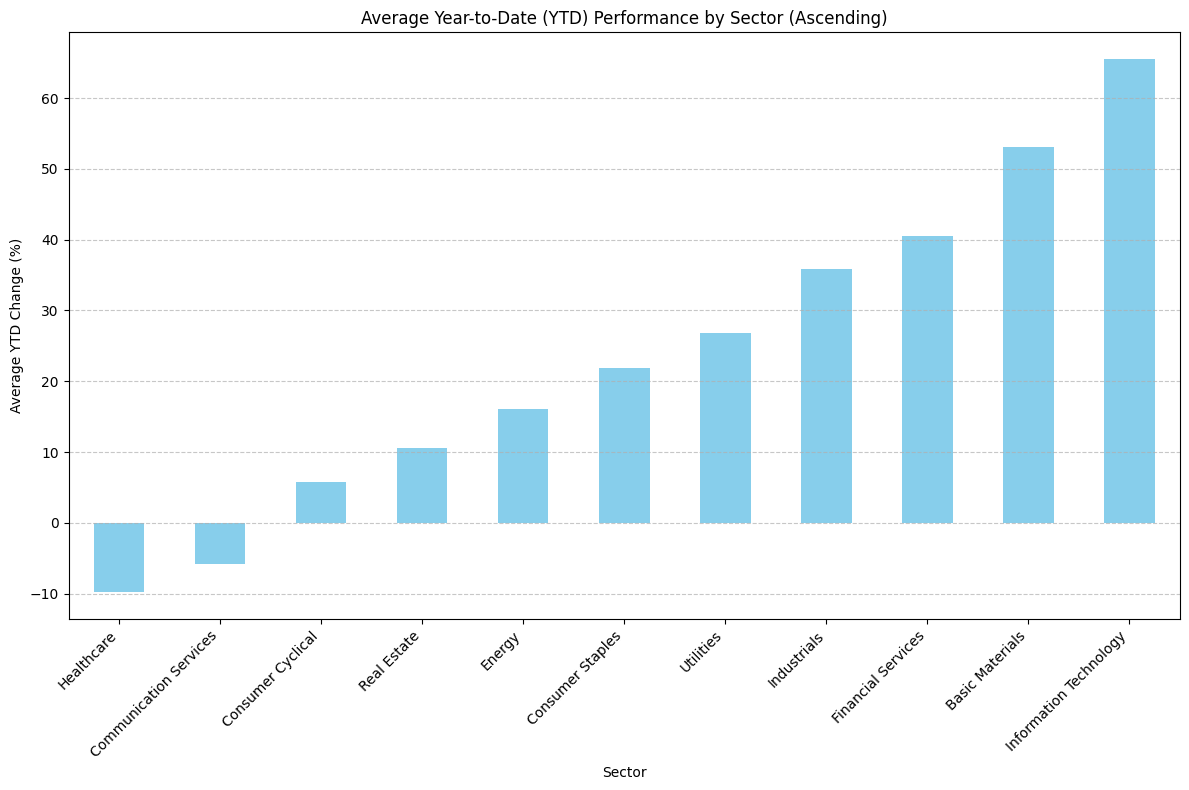

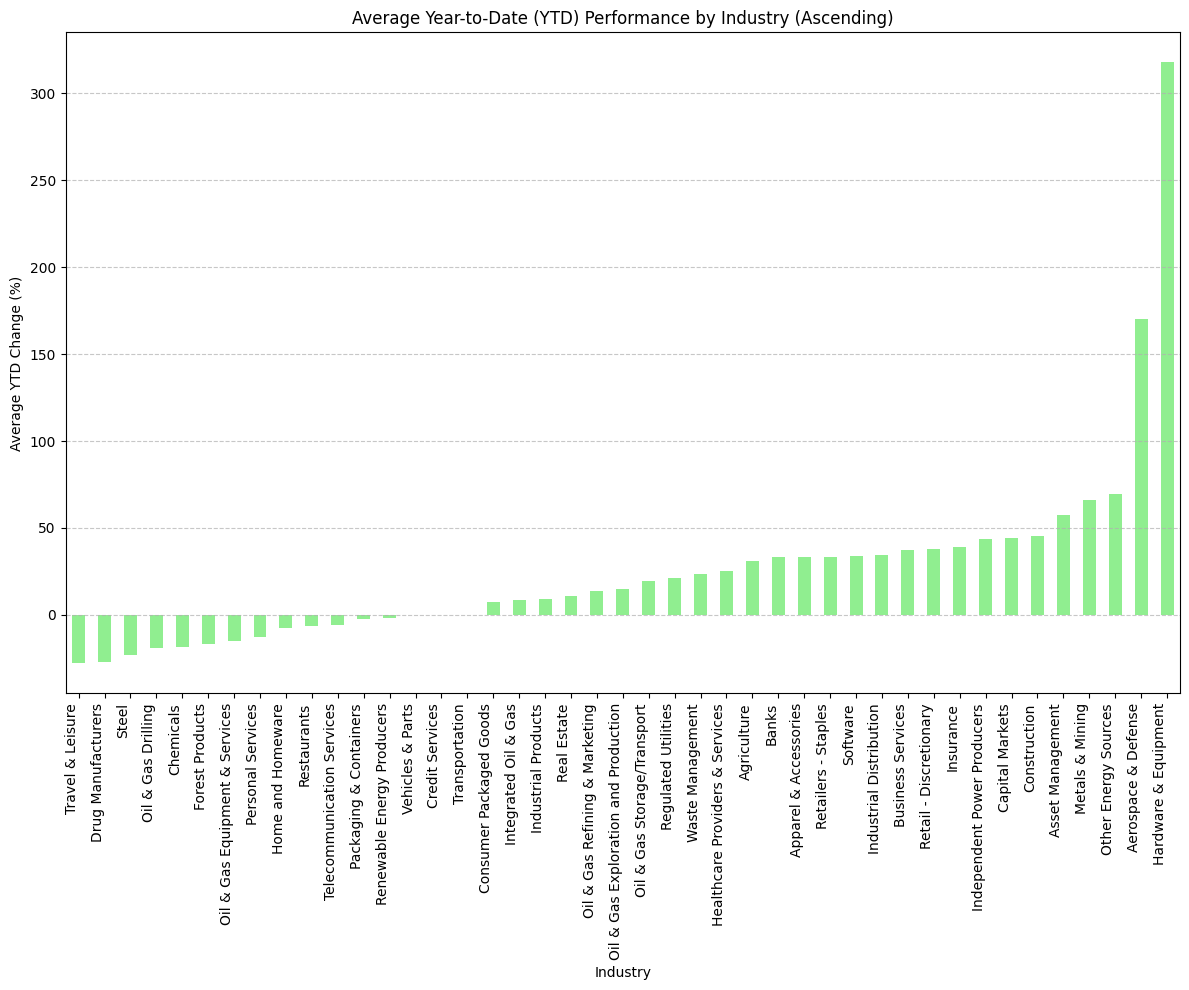


IMPORTANT NOTE: The output of these plots might be misleading due to several factors.
1. Small Sample Size: Some industries or sectors may be represented by only a few companies,
   meaning the average performance could be heavily skewed.
2. Outliers: A single high- or low-performing company can have a disproportionate impact
   on the average, making the group appear better or worse than it truly is.
3. Incomplete Data: The `SP_TSX` data used for the merge may not be exhaustive,
   potentially causing important companies, sectors, or industries to be missing from the analysis.
For more reliable insights, it is important to compare these results with other
data sources that have larger and more comprehensive samples.



In [20]:
# --- Calculate YTD Performance ---

# To calculate YTD for each ticker, we first sort by date.
# We create a new DataFrame, 'df_sorted', for this operation to avoid
# modifying the original 'df_long' DataFrame in place.
df_sorted = df_long.sort_values(by='Date')

# Find the first 'Adj Close' for each Ticker for the year
start_of_year_prices = df_sorted.groupby('Ticker')['Adj Close'].first().reset_index(name='Start_Price')

# Find the last 'Adj Close' for each Ticker
end_of_year_prices = df_sorted.groupby('Ticker')['Adj Close'].last().reset_index(name='End_Price')

# Create a new DataFrame with the start and end prices for each ticker
start_end_prices = pd.merge(start_of_year_prices, end_of_year_prices, on='Ticker')

# Calculate the YTD percentage change for each ticker using the new DataFrame
start_end_prices['YTD_Change'] = (start_end_prices['End_Price'] - start_end_prices['Start_Price']) / start_end_prices['Start_Price'] * 100

# Merge the YTD performance with the sector and industry data
sector_industry_ytd = start_end_prices.merge(SP_TSX[['Ticker', 'Sector', 'Industry']], on='Ticker', how='left')

# --- Plotting Average YTD Performance by Sector ---

# Calculate the average YTD change for each sector and sort in ascending order
average_sector_ytd = sector_industry_ytd.groupby('Sector')['YTD_Change'].mean().sort_values(ascending=True)

# Create the bar plot for sectors
plt.figure(figsize=(12, 8))
average_sector_ytd.plot(kind='bar', color='skyblue')
plt.title('Average Year-to-Date (YTD) Performance by Sector (Ascending)')
plt.xlabel('Sector')
plt.ylabel('Average YTD Change (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plotting Average YTD Performance by Industry ---

# Calculate the average YTD change for each industry and sort in ascending order
average_industry_ytd = sector_industry_ytd.groupby('Industry')['YTD_Change'].mean().sort_values(ascending=True)

# Create the bar plot for industries
plt.figure(figsize=(12, 10))
average_industry_ytd.plot(kind='bar', color='lightgreen')
plt.title('Average Year-to-Date (YTD) Performance by Industry (Ascending)')
plt.xlabel('Industry')
plt.ylabel('Average YTD Change (%)')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
IMPORTANT NOTE: The output of these plots might be misleading due to several factors.
1. Small Sample Size: Some industries or sectors may be represented by only a few companies,
   meaning the average performance could be heavily skewed.
2. Outliers: A single high- or low-performing company can have a disproportionate impact
   on the average, making the group appear better or worse than it truly is.
3. Incomplete Data: The `SP_TSX` data used for the merge may not be exhaustive,
   potentially causing important companies, sectors, or industries to be missing from the analysis.
For more reliable insights, it is important to compare these results with other
data sources that have larger and more comprehensive samples.
""")

### 📈 Global Sector and Industry Data

For a comprehensive global perspective on market sectors and industries, the **Yahoo Finance Sectors** page is an excellent resource.

### 🔍 How to Navigate

-   **Sector Overview:**

    -   Find a high-level summary of all market sectors on the main page.

    -   **URL:**  <https://finance.yahoo.com/sectors/>

-   **Industry Deep Dive:**

    -   Click on any sector name from the main page to explore its specific industries.

    -   This will lead you to a new page with detailed information, news, and performance data for all the industries within that sector.

This guide should make it easy to find the data you're looking for!

## 📈 Relative Strength Index (RSI) Analysis

### 🔎 What is RSI?  
The **Relative Strength Index (RSI)** is a momentum oscillator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock.

- RSI values range from 0 to 100.  
- An RSI **above 70** typically indicates that a stock is **overbought**.  
- An RSI **below 30** usually signals that a stock is **oversold**.

---

### ⚙️ Calculation of RSI

The RSI is calculated using the following formulas:

1. **Calculate daily price changes:**


$\Delta P_t = P_t - P_{t-1}$


Where \($P_t$\) is the price at time ($t$\).

2. **Separate gains and losses:**

\[
\begin{aligned}
\text{Gain}_t &=
\begin{cases}
\Delta P_t, & \text{if } \Delta P_t > 0 \\
0, & \text{otherwise}
\end{cases} \\\\
\text{Loss}_t &=
\begin{cases}
-\Delta P_t, & \text{if } \Delta P_t < 0 \\
0, & \text{otherwise}
\end{cases}
\end{aligned}
\]



### 📐 RSI Calculation Formulas

3. **Calculate average gain and average loss over a period $n$ (typically 14 days):**

$$
\text{Avg Gain} = \frac{1}{n} \sum_{i=1}^n \text{Gain}_i 
\quad , \quad 
\text{Avg Loss} = \frac{1}{n} \sum_{i=1}^n \text{Loss}_i
$$

4. **Compute the Relative Strength (RS):**

$$
RS = \frac{\text{Avg Gain}}{\text{Avg Loss}}
$$

5. **Calculate RSI:**

$$
RSI = 100 - \left( \frac{100}{1 + RS} \right)
$$

* * * * *

---

### 📊 How We Used RSI Here  
- Calculated the RSI for each stock using the last 14 trading days of adjusted closing prices.  
- Identified stocks with the **highest RSI** (potentially overbought) and **lowest RSI** (potentially oversold).  
- Visualized the extremes with color-coded bar charts for intuitive momentum assessment.

---

### 🎯 Why RSI is Useful  
RSI helps traders and investors:  
- Detect potential **trend reversals** early.  
- Time **entries and exits** with greater confidence.  
- Complement fundamental analysis with **technical momentum insights**.

---

This technical momentum measure adds an essential dimension to our comprehensive stock analysis on the S&P/TSX Composite Index.


/var/folders/gm/fn54mj5d4b51_7l5j667v4n00000gn/T/ipykernel_30338/2232666634.py:26: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



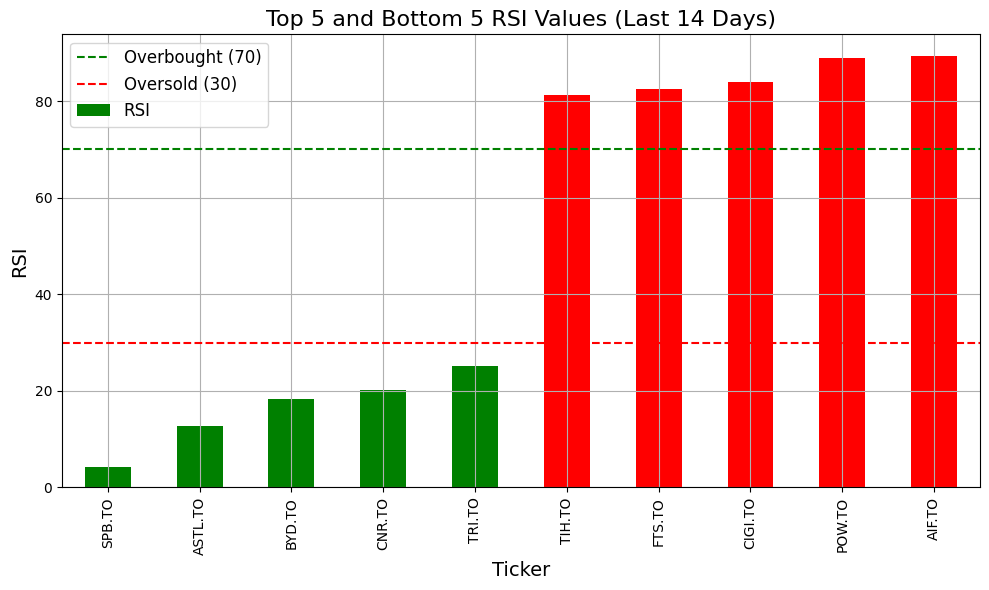

Top 5 and Bottom 5 RSI Values (Last 14 Days):
Ticker
AIF.TO     89.373789
POW.TO     89.017233
CIGI.TO    83.956104
FTS.TO     82.620354
TIH.TO     81.265350
SPB.TO      4.316543
ASTL.TO    12.640446
BYD.TO     18.423568
CNR.TO     20.096524
TRI.TO     25.124719
Name: RSI, dtype: float64


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate RSI for a group (manual implementation, last 14 days)
def calculate_rsi(group, period=14):
    # Ensure the group is sorted by date
    group = group.sort_values('Date')
    # Take only the last 14 days of data
    group = group.tail(period)
    # Calculate daily price changes
    delta = group['Adj Close'].diff()
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    # Calculate average gain and loss over the period
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
    # Calculate RS (Relative Strength)
    rs = avg_gain / avg_loss
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI for each ticker using the last 14 days
df_long['RSI'] = df_long.groupby('Ticker').apply(calculate_rsi).reset_index(level=0, drop=True)

# Get the latest RSI value for each ticker
latest_rsi = df_long.groupby('Ticker')['RSI'].last().dropna()

# Find the top 5 (highest RSI) and bottom 5 (lowest RSI) tickers
top_5_rsi = latest_rsi.nlargest(5)
bottom_5_rsi = latest_rsi.nsmallest(5)

# Combine the top and bottom tickers for plotting
top_bottom_rsi = pd.concat([top_5_rsi, bottom_5_rsi])

# Define colors: green for top 5 (highest RSI), red for bottom 5 (lowest RSI)
colors = ['green' if ticker in top_5_rsi.index else 'red' for ticker in top_bottom_rsi.index]

# Plot the top 5 and bottom 5 RSI values
plt.figure(figsize=(10, 6))
top_bottom_rsi.sort_values().plot(kind='bar', color=colors)
plt.title('Top 5 and Bottom 5 RSI Values (Last 14 Days)', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('RSI', fontsize=14)
plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Print RSI values to verify
print("Top 5 and Bottom 5 RSI Values (Last 14 Days):")
print(top_bottom_rsi)

In [22]:

# Get the latest adjusted close price for the bottom 5 RSI tickers
latest_date = df_long['Date'].max()
bottom_5_adj_close = df_long[df_long['Date'] == latest_date][['Ticker', 'Adj Close']].set_index('Ticker').loc[bottom_5_rsi.index].reset_index()

# Create a DataFrame with only Ticker and Adj Close
result = bottom_5_adj_close[['Ticker', 'Adj Close']]

# Print the DataFrame
print("Latest Adjusted Close Prices for Bottom 5 RSI Tickers (as of August 1, 2025):")
print(result)

Latest Adjusted Close Prices for Bottom 5 RSI Tickers (as of August 1, 2025):
    Ticker   Adj Close
0   SPB.TO    6.890000
1  ASTL.TO    6.840000
2   BYD.TO  190.000000
3   CNR.TO  129.600006
4   TRI.TO  275.029999


## Bottom 5 RSI Stocks: YTD Performance Analysis

This section analyzes the year-to-date (YTD) returns of the five stocks with the lowest 14-day RSI values, comparing them against:

- Their sector and industry average returns  
- Major benchmarks: S&P 500 (^GSPC) and S&P/TSX Composite (^GSPTSE)

---

### Process Overview

1. **Validate DataFrame**  
   Confirm `df_long` contains: `'Date'`, `'Ticker'`, `'Adj Close'`, `'Sector'`, and `'Industry'`.

2. **Define YTD Return Calculation**  
   The `get_ytd_return()` function fetches historical prices from January 1st of the current year and computes YTD return.

3. **Get Benchmark YTD Returns**  
   Calculate YTD returns for S&P 500 and TSX Composite.

4. **Evaluate Bottom 5 RSI Stocks**  
   For each ticker:  
   - Retrieve sector and industry info  
   - Calculate YTD return  
   - Store results

5. **Merge With Sector & Industry Averages**  
   Combine individual returns with sector and industry averages for comparison.

---

### Final Output

The output table includes:

- Ticker  
- Sector  
- Industry  
- Stock YTD Return (%)  
- Sector Avg YTD Return (%)  
- Industry Avg YTD Return (%)  
- S&P 500 YTD Return (%)  
- TSX Composite YTD Return (%)

This enables identifying if bottom RSI stocks are outperforming or lagging their peers and benchmarks.


In [26]:
import pandas as pd
from datetime import datetime
import yfinance as yf

# Validate df_long
required_columns = ['Date', 'Ticker', 'Adj Close', 'Sector', 'Industry']
missing_cols = set(required_columns) - set(df_long.columns)
if missing_cols:
    raise ValueError(f"df_long missing required columns: {', '.join(missing_cols)}")

# Get bottom 5 RSI tickers as a list
bottom_5_rsi_tickers = bottom_5_rsi.index.tolist()

# Function to calculate YTD return for a ticker using yfinance
def get_ytd_return(ticker):
    try:
        ticker_data = yf.Ticker(ticker)
        start_of_year = datetime(datetime.now().year, 1, 1)
        history = ticker_data.history(start=start_of_year)
        if not history.empty:
            start_price = history.iloc[0]['Close']
            end_price = history.iloc[-1]['Close']
            return round(((end_price - start_price) / start_price) * 100, 2)
        else:
            return None
    except Exception as e:
        print(f"Error fetching YTD return for {ticker}: {e}")
        return None

# Get market index YTD returns for reference
sp500_ytd = get_ytd_return('^GSPC')
tsx_ytd = get_ytd_return('^GSPTSE')

# Prepare results list
results = []

for ticker in bottom_5_rsi_tickers:
    # Get sector and industry info from df_long
    ticker_info = df_long[df_long['Ticker'] == ticker][['Sector', 'Industry']].drop_duplicates()
    sector = ticker_info.iloc[0]['Sector'] if not ticker_info.empty else 'N/A'
    industry = ticker_info.iloc[0]['Industry'] if not ticker_info.empty else 'N/A'

    # Calculate YTD return
    ytd_return = get_ytd_return(ticker)

    if ytd_return is not None:
        results.append({
            'Ticker': ticker,
            'Sector': sector,
            'Industry': industry,
            'YTD Return (%)': ytd_return,
            'S&P 500 YTD (%)': sp500_ytd,
            'TSX YTD (%)': tsx_ytd
        })

# Create DataFrame and merge sector/industry averages if results exist
if results:
    df_results = pd.DataFrame(results)
    df_results = df_results.merge(average_sector_ytd, left_on='Sector', right_index=True, how='left').rename(columns={'YTD_Change': 'Sector Avg YTD (%)'})
    df_results = df_results.merge(average_industry_ytd, left_on='Industry', right_index=True, how='left').rename(columns={'YTD_Change': 'Industry Avg YTD (%)'})
    df_results.set_index('Ticker', inplace=True)

    print("\n--- YTD Performance Report ---")
    print(df_results[['Sector', 'Industry', 'YTD Return (%)', 'Sector Avg YTD (%)', 'Industry Avg YTD (%)', 'S&P 500 YTD (%)', 'TSX YTD (%)']].to_string())
else:
    print("\nNo data retrieved for the specified tickers.")

# Additionally, show latest adjusted close prices for bottom 5 RSI tickers from df_long
latest_date = df_long['Date'].max()
bottom_5_adj_close = df_long[(df_long['Date'] == latest_date) & (df_long['Ticker'].isin(bottom_5_rsi_tickers))][['Ticker', 'Adj Close']].reset_index(drop=True)

print(f"\nLatest Adjusted Close Prices for Bottom 5 RSI Tickers (as of {latest_date.date()}):")
print(bottom_5_adj_close.to_string(index=False))

print("\n" + "="*50 + "\n" +
      "Note: Results may be skewed by small sample sizes, outliers, or incomplete data in df_long or yfinance.\n" +
      "="*50 + "\n")



--- YTD Performance Report ---
                    Sector             Industry  YTD Return (%)  Sector Avg YTD (%)  Industry Avg YTD (%)  S&P 500 YTD (%)  TSX YTD (%)
Ticker                                                                                                                                 
SPB.TO           Utilities  Regulated Utilities           11.11           26.772799             21.080884             7.34        10.73
ASTL.TO    Basic Materials                Steel          -50.28           53.146313            -23.162983             7.34        10.73
BYD.TO   Consumer Cyclical    Personal Services          -11.50            5.830655            -12.980923             7.34        10.73
CNR.TO         Industrials       Transportation          -10.61           35.906337              0.113905             7.34        10.73
TRI.TO         Industrials    Business Services           18.80           35.906337             37.278175             7.34        10.73

Latest Adjusted

Deep-Dive Stock Fundamentals with GuruFocus 📊

==============================================

For stock fundamentals, Yahoo Finance gives a quick peek, but it's too basic for serious analysis. My top pick, **GuruFocus** 🛥️, offers richer insights with detailed metrics, historical trends, and industry comparisons, using a stock like TSX:SPB as an example. Other platforms can work too, but GuruFocus stands out. Here's why:

Why GuruFocus Rocks 🛥️

-----------------------

-   **Detailed Metrics** 📈: P/E, ROIC, and EPS forecasts dig deeper than Yahoo's basics.

-   **Historical Trends** 📅: See how metrics like dividends or P/E have changed over time.

-   **Industry Context** ⚖️: Compares stocks to peers, showing strengths or risks.

-   **Unique Tools** 💡: Piotroski F-Score, Altman Z-Score, and more flag risks or stability.

-   **Analyst Data** 🎯: Ratings and price targets give a clearer outlook.

Yahoo Finance's Limits 🤔

-------------------------

Yahoo Finance shows prices and yields but skips historical depth, industry benchmarks, and proprietary scores. It's a start, not the full picture.

Alternatives to GuruFocus 🌟

----------------------------

GuruFocus is my favorite, but try these:

-   **Morningstar**: Deep financials and analyst reports.

-   **Seeking Alpha**: Community insights and data.

-   **Zacks**: Earnings-focused rankings.

-   **Bloomberg**: Pro-grade data (pricey).

Watch Out ⚠️

------------

-   **Access Limits**: GuruFocus's free tier limits data; premium unlocks more.

-   **Verify Data**: Cross-check with filings (e.g., SEDAR) for accuracy.

Explore GuruFocus 🌐

--------------------

Check out: **GuruFocus**

Enter a ticker for detailed insights. Free access may cap quickly, so consider premium.

Takeaway 📝

-----------

Yahoo Finance skims the surface. **GuruFocus** 🛥️ dives deep with data, trends, and benchmarks. Alternatives like Morningstar work too.

Valuation Analysis 📊
======================================

Introduction
------------

Valuing companies in the utilities sector requires a robust framework that accounts for their stable cash flows and sensitivity to economic and regulatory conditions. In this analysis, we focus on the discounted cash flow (DCF) method, supplemented by exit multiple approaches, to estimate enterprise value. Our valuation begins with macroeconomic data to set a foundation for long-term growth assumptions, ensuring alignment with Canada's economic environment. We then apply sector-specific multiples to capture operational performance, providing a comprehensive view of value for utilities companies. This approach leverages authoritative data sources to ensure accuracy and relevance.

Macroeconomic Context 🌍
------------------------

To anchor our valuation, we start with macroeconomic data, specifically Canada's real GDP growth rates for the past five years. This data is essential for **terminal value calculations** in DCF models and **macroeconomic analysis** to reflect the economic stability impacting utilities companies. The **Global Macro Database** (NBER Working Paper 33714) underscores the importance of long-term macroeconomic trends, noting that events like financial crises can influence GDP over decades, guiding conservative growth assumptions.

### Why Macro Data Matters

-   **Terminal Value in DCF** 📈: The terminal growth rate in a DCF model must be sustainable and aligned with a country's long-term economic growth. Historical GDP growth provides a benchmark to ensure terminal rates remain conservative, reflecting Canada's economic ceiling.

-   **Macro Analysis** 🔍: GDP trends inform the economic environment for utilities, which rely on stable demand and regulatory frameworks. Understanding these trends supports assumptions about revenue predictability and operational resilience in Canada's regulated markets.

### Long-Term Growth Rates

We use three terminal growth rate scenarios (pessimistic, base, optimistic) for DCF calculations, validated against Canada's historical GDP growth. These rates are set conservatively to align with economic stability, as supported by the Global Macro Database's insights on long-term output trends.\
**Source**: OECD Data Explorer API (https://sdmx.oecd.org, QNA dataset)

Exit Multiples (EV/EBITDA) 💰
-----------------------------

For terminal value estimation using the exit multiple method, we apply EV/EBITDA multiples tailored to the utilities sector, reflecting its stable, regulated cash flows. We use three scenarios (pessimistic, base, optimistic) sourced from industry benchmarks. These multiples are conservative compared to sector medians, accounting for potential economic or regulatory challenges.\
**Source**: GuruFocus and Morningstar

Valuation Application 🏭
------------------------

-   **Terminal Value**: GDP-based growth rates ensure DCF terminal values align with Canada's economic outlook, while EV/EBITDA multiples estimate enterprise value based on sector-specific performance. For example, applying a base multiple to a company's EBITDA yields a reliable valuation benchmark.

-   **Macro Analysis**: Historical GDP data supports assumptions about economic stability, crucial for utilities' predictable cash flows and regulatory environment.

**Sources**:

-   OECD Data Explorer API (https://sdmx.oecd.org, QNA dataset) for GDP growth.

-   Global Macro Database (NBER Working Paper 33714) for macro context.

-   GuruFocus and Morningstar for EV/EBITDA multiples.

In [27]:
import warnings
from global_macro_data import gmd
import pandas as pd

# Suppress warnings from pandas and global_macro_data
warnings.filterwarnings("ignore")

# Load rGDP for Canada
df = gmd(version="2025_06", country=["CAN"], variables=["rGDP"])

# Filter from 2019 onward and set index
df = df[df['year'] >= 2019].copy()
df.set_index('year', inplace=True)

# Calculate year-over-year growth rates without filling (to avoid warnings)
growth = df['rGDP'].pct_change(fill_method=None) * 100
df['growth_rate'] = growth

# Display clean growth rate table (dropping NaNs)
growth_clean = df['growth_rate'].dropna().round(2)
print("Year-over-Year Real GDP Growth Rates (%) for Canada:")
print(growth_clean)

# Calculate mean growth rate for 2025-2029
growth_25_29 = growth_clean.loc[2025:2029]
mean_growth = growth_25_29.mean()

print(f"\nMean growth rate for 2025-2029: {mean_growth:.2f}%")

# Scenario approximations
optimal = mean_growth * 0.90          # Slightly below mean
normal = mean_growth * 0.60          # A bit below optimal
pessimistic = mean_growth * 0.30     # Way below optimal

print("\nScenario Growth Rates (%):")
print(f"Optimal: {optimal:.2f}%")
print(f"Normal: {normal:.2f}%")
print(f"Pessimistic: {pessimistic:.2f}%")


Downloading: https://www.globalmacrodata.com/GMD_2025_06.csv
Filtered data for countries: CAN
Selected 4 variables
Final dataset: 231 observations of 4 variables
Year-over-Year Real GDP Growth Rates (%) for Canada:
year
2020   -5.04
2021    5.29
2022    3.82
2023    1.07
2024    1.04
2025    1.82
2026    2.10
2027    1.82
2028    1.77
2029    1.64
Name: growth_rate, dtype: float64

Mean growth rate for 2025-2029: 1.83%

Scenario Growth Rates (%):
Optimal: 1.65%
Normal: 1.10%
Pessimistic: 0.55%


# DCF Growth Period Explained 📊

The **Discounted Cash Flow (DCF)** model uses two growth phases to estimate a company's value: the **explicit forecast period** and **terminal value period**. Below is a concise overview with resources for reasonable growth rates.

## 1. Explicit Forecast Period 🚀

- **What**: 5--10 years of projected cash flows (e.g., FCFF).

- **Growth Rate**: Reflects company growth (5--15%), based on:

  - Historical revenue/CAGR 📅

  - Industry trends 🌍 (e.g., tech: 10--20%, utilities: 2--4%)

  - Company factors 🏢 (market share, innovation)

- **Example**: Apple at 7--10%, utilities at 2--4%.

## 2. Terminal Value Period 🌱

- **What**: Perpetual cash flows beyond forecast period.

- **Growth Rate**: Conservative, tied to GDP (1--3% in developed markets).

  - Align with risk-free rate or inflation 📈

  - Mature industries: 1--2%; innovative sectors: 2--3%

- **Example**: 2% for stable firms in developed markets.

## Resources for Growth Rates 📚

1\. **Morningstar**: Analyst growth forecasts. [Link](https://www.morningstar.com/)

2\. **Yahoo Finance**: Consensus growth estimates. [Link](https://finance.yahoo.com/)

3\. **Bloomberg**: Industry/macroeconomy data. [Link](https://www.bloomberg.com/)

4\. **S&P Global**: Sector growth projections. [Link](https://www.spglobal.com/)

5\. **GuruFocus**: Historical growth metrics. [Link](https://www.gurufocus.com/)

6\. **FRED**: GDP/inflation for terminal rates. [Link](https://fred.stlouisfed.org/)

7\. **Damodaran Online**: Industry growth datasets. [Link](http://pages.stern.nyu.edu/~adamodar/)

## Tips 🛠️

- Cross-check historical and analyst data ✅

- Stay conservative to avoid overvaluation ⚠️

- Use sensitivity analysis (±2% short-term, ±0.5% perpetual) 📊

## 💰 Discounted Cash Flow (DCF) Preparation: Free Cash Flow Growth Estimation

This script retrieves and analyzes **historical Free Cash Flow (FCF)** data from Yahoo Finance via the `yfinance` library, for a list of selected tickers. The main goal is to prepare inputs for a simplified **DCF (Discounted Cash Flow)** model by estimating each firm's **FCF growth rate**.

---

### 📘 What the Code Does (Step-by-Step)

1. **📥 Download FCF Data**
   - For each ticker (e.g., `SPB.TO`, `BYD.TO`), the script retrieves the **annual Free Cash Flow (FCF)** figures using:
     ```python
     stock.cashflow.loc['Free Cash Flow']
     ```
   - FCF values are divided by `1e6` to convert from raw units to **millions of currency units**.
   - The series is reversed (`[::-1]`) to order the data **chronologically** from oldest to most recent.

2. **📈 Calculate the Compound Annual Growth Rate (CAGR)**  
   If the company has at least 2 years of FCF data and the starting FCF is not zero:
   - The **CAGR** is calculated as:

     $$
     \text{CAGR} = \left( \frac{FCF_{\text{end}}}{FCF_{\text{start}}} \right)^{\frac{1}{n}} - 1
     $$
     where:
     - \( $FCF_{\text{start}}$ \): Free cash flow in the first year  
     - \( $FCF_{\text{end}}$ \): Free cash flow in the most recent year  
     - \( $n$ \): number of periods (years) between start and end  

   This gives the **average annual growth rate** of FCF over the period.

3. **📌 Capture Latest FCF**
   - The script extracts the most recent FCF value (last element in the series) to serve as the base year for forward projections in DCF.

4. **📊 Store Results**
   - For each ticker, a dictionary is created with:
     - Ticker name
     - Latest FCF (in millions)
     - Estimated FCF CAGR (as a percentage)

   These dictionaries are compiled into a final **DataFrame**.

---

### 📐 Why This Matters

Both the **latest FCF** and its **growth rate** are key inputs for a **DCF valuation**, which involves projecting future cash flows and discounting them to present value.

The CAGR calculation provides a **historical average growth rate**, which can be:
- Used as a **base assumption** for forecasting
- Adjusted later based on analyst insights or macroeconomic expectations

---

### ⚠️ Notes

- CAGR assumes **smooth, exponential growth**, which may not always reflect real business cycles.
- Negative or highly volatile FCF histories may distort CAGR results.
- TTM (Trailing Twelve Months) is **excluded** to avoid partial-year distortions.

---

✅ This is a good first step for a more comprehensive valuation model. You can later use this output to:
- Project FCF for future years
- Discount those FCFs to present value
- Estimate firm or equity value using terminal value assumptions


In [28]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = ['SPB.TO', 'BYD.TO']
dcf_list = []

for t in tickers:
    stock = yf.Ticker(t)
    
    # Get and clean annual Free Cash Flow (in millions)
    fcf_annual = stock.cashflow.loc['Free Cash Flow'].dropna() / 1e6
    fcf_annual = fcf_annual[::-1]

    # Calculate CAGR excluding TTM
    if len(fcf_annual) > 1 and fcf_annual.iloc[0] != 0:
        start = fcf_annual.iloc[0]
        end = fcf_annual.iloc[-1]
        years = len(fcf_annual) - 1
        cagr = (end / start) ** (1 / years) - 1
    else:
        cagr = np.nan

    # Get latest FCF (most recent year)
    latest_fcf = fcf_annual.iloc[-1]

    # Append dictionary for DataFrame
    dcf_list.append({
        'Ticker': t,
        'Latest FCF (Millions)': latest_fcf,
        'Average Growth Rate (%)': cagr * 100
    })

# Convert to DataFrame
dcf_df = pd.DataFrame(dcf_list)

print(dcf_df.to_string(index=False))


Ticker  Latest FCF (Millions)  Average Growth Rate (%)
SPB.TO                113.700                 4.537461
BYD.TO                232.868                13.251121


## 🔗 Merging DCF Inputs with Cost of Capital (WACC) and Preparing Summary Table

This code combines key inputs required for a Discounted Cash Flow (DCF) valuation — **Free Cash Flow (FCF) data** and the firm's **Weighted Average Cost of Capital (WACC)** — and displays a clean summary table.

---

### 🛠 What the Code Does

1. **Merging DataFrames**  
   - `dcf_df` contains:
     - Ticker symbols (e.g., 'SPB.TO', 'BYD.TO')  
     - Latest Free Cash Flow (in millions)  
     - Average FCF growth rate (CAGR, %)  

   - `df` contains (among other data):  
     - Ticker symbols  
     - WACC values (%) for each firm  

   - The code merges these two DataFrames on the `'Ticker'` column to align FCF and WACC data for each company.

2. **Data Cleaning**  
   - The ticker strings are cleaned by stripping whitespace and removing any newline `\n`, carriage return `\r`, or tab `\t` characters to ensure uniformity and avoid merge/display issues.

3. **Selecting Relevant Columns**  
   - A final list of columns is defined for display:
     - `'Ticker'`  
     - `'Latest FCF (Millions)'`  
     - `'Average Growth Rate (%)'`  
     - `'WACC (%)'`  

4. **Displaying the Table**  
   - The first 4 rows of the merged and cleaned data are selected.
   - The table is printed with **`tabulate`** using the `psql` style, which formats the output as a nice ASCII table for easy readability.

---

### 📊 Why This Is Useful

- Combining **FCF and WACC** is essential because:
  - FCF represents the firm's expected cash generation ability.
  - WACC reflects the average rate the company must pay to finance its operations (both debt and equity).
- Together, they are critical inputs to calculate the **present value** of future cash flows in DCF models.

---

### ⚠️ Notes

- Ensure both `dcf_df` and `df` contain matching ticker symbols before merging.
- Cleaning ticker strings avoids common data issues with messy imports.
- This summary allows quick inspection of the core DCF inputs before performing valuation calculations.

---

You can now proceed to use these combined inputs to calculate enterprise or equity value using the standard DCF formula.


# Calculating Weighted Average Cost of Capital (WACC) 📊

## Overview

This analysis calculates the WACC for given tickers by combining real market and company data:

1. **Risk-Free Rate** \($R_f$\)
   - Retrieved from the Canadian 10-year government bond yield.

2. **Corporate Tax Rate** \($T_c$\)  
   - Obtained from official Canadian tax rates.

3. **Market Return** \($R_m$\) 
   - Annualized return of the TSX Composite Index over the past 5 years.

4. **Company-Specific Data**  
   - Beta \($\beta$\), market capitalization (equity value), total debt, and interest expense retrieved from Yahoo Finance.

---

## Mathematical Formulas Used

### Cost of Equity \($R_e$\) — CAPM Model

$
R_e = R_f + \beta (R_m - R_f)
$


- \($R_f$\): Risk-free rate  
- \($\beta$\): Stock's beta  
- \($R_m$\): Market return

---

### Cost of Debt \($R_d$\)

Calculated as the average interest expense over total debt:

$
R_d = \frac{\text{Interest Expense}}{\text{Total Debt}}
$

---

### Weights of Equity and Debt

$
W_e = \frac{E}{E + D} \quad , \quad W_d = \frac{D}{E + D}
$

- \($E$\): Market capitalization (equity)  
- \($D$\): Total debt

---

### Weighted Average Cost of Capital (WACC)

$
WACC = W_e \times R_e + W_d \times R_d \times (1 - T_c)
$

- \($T_c$\): Corporate tax rate

---

## What the Code Does

- Fetches up-to-date market and financial data from various sources:
  - Risk-free rate and tax rate scraped from official web pages.
  - TSX market return calculated over 5 years via Yahoo Finance.
  - Company-specific financials and market data retrieved via Yahoo Finance API.

- Computes each component using the formulas above.

- Outputs a summary table with values for beta, debt, market cap, risk-free rate, cost of equity, cost of debt, tax rate, and the final WACC for each ticker.

---

## Why It Matters

WACC is crucial as it represents the minimum return a company must generate to satisfy both equity and debt investors. It is widely used as the discount rate in valuation models, such as discounted cash flow (DCF), to estimate the fair value of companies.

---

*This structured approach ensures your valuation inputs are grounded in realistic and current market conditions.*


In [29]:
import yfinance as yf
import requests
import re
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate

def get_risk_free_rate():
    url = "https://www.investing.com/rates-bonds/canada-10-year-bond-yield-historical-data"
    resp = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(resp.text, 'html.parser')
    val = soup.find(text=re.compile(r"\d\.\d{3}"))
    return float(val.strip()) / 100 if val else None

def get_tax_rate():
    url = "https://sslgroup.ca/information/tax-rates/"
    headers = {"User-Agent": "Mozilla/5.0"}
    resp = requests.get(url, headers=headers)
    soup = BeautifulSoup(resp.text, 'html.parser')
    table = soup.find('table', id='tablepress-18')
    if not table:
        return None
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) >= 2 and re.search(r'General Rate', cols[0].text, re.I):
            match = re.search(r'([\d\.]+)%', cols[1].text)
            if match:
                return float(match.group(1)) / 100
    return None

def get_annualized_return():
    tsx = yf.download('^GSPTSE', period="5y")['Close']
    if tsx.empty:
        raise ValueError("TSX index data could not be retrieved.")
    return (tsx.iloc[-1] / tsx.iloc[0]) ** (1 / 5) - 1

def get_avg_cost_of_debt(ticker):
    stock = yf.Ticker(ticker)
    fin = stock.financials
    bs = stock.balance_sheet
    interest_keys = ['Interest Expense', 'InterestExpense']
    debt_keys = ['Total Debt']

    for ik in interest_keys:
        if ik in fin.index:
            interest = fin.loc[ik].iloc[:4].to_dict()
            break
    else:
        return None

    for dk in debt_keys:
        if dk in bs.index:
            debt = bs.loc[dk].iloc[:4].to_dict()
            break
    else:
        return None

    values = [abs(interest[d] / debt[d]) for d in interest if d in debt and debt[d] != 0]
    return np.mean(values) if values else None

def compute_wacc(ticker, annualized_return):
    stock = yf.Ticker(ticker)
    info = stock.info
    beta = info.get('beta')
    mc = info.get('marketCap')
    td = info.get('totalDebt', 0)

    if not beta or not mc:
        return {"Ticker": ticker, "Error": "Missing beta or market cap"}

    rf = get_risk_free_rate()
    re = beta * (annualized_return - rf)
    rd = get_avg_cost_of_debt(ticker)
    tc = get_tax_rate()
    fv = mc + td
    we, wd = mc / fv, td / fv
    wacc = we * re + wd * rd * (1 - tc)

    return {
        'Ticker': ticker,
        'Beta': round(beta, 3),
        'Total Debt (M)': round(td / 1e6, 2),
        'Market Cap (M)': round(mc / 1e6, 2),
        'Rf (%)': round(rf * 100, 2),
        'Re (%)': round(re * 100, 2),
        'Rd (%)': round(rd * 100, 2),
        'Tax Rate (%)': round(tc * 100, 2),
        'WACC (%)': round(wacc * 100, 2)
    }

# Run calculation for tickers
annualized_return = get_annualized_return()
tickers = ['SPB.TO', 'BYD.TO']
results = [compute_wacc(t, annualized_return) for t in tickers]

# Make dataframe
df = pd.DataFrame(results)

# Use tabulate to print nice R-style table
print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))


[*********************100%***********************]  1 of 1 completed


+----------+--------+------------------+------------------+----------+----------+----------+----------------+------------+
| Ticker   |   Beta |   Total Debt (M) |   Market Cap (M) |   Rf (%) |   Re (%) |   Rd (%) |   Tax Rate (%) |   WACC (%) |
|----------+--------+------------------+------------------+----------+----------+----------+----------------+------------|
| SPB.TO   |  0.415 |           1796.8 |          1599.86 |     3.38 |     3.08 |     4.77 |           26.5 |       3.31 |
| BYD.TO   |  0.485 |           1253.9 |          4078.88 |     3.38 |     3.6  |     4.17 |           26.5 |       3.48 |
+----------+--------+------------------+------------------+----------+----------+----------+----------------+------------+


## Now we make a dataframe of all relevant variables to build  a DCF

In [35]:
import pandas as pd
from tabulate import tabulate

# Assuming dcf_df and df already exist:
# dcf_df has: 'Ticker', 'Latest FCF (Millions)', 'Average Growth Rate (%)'
# df has: 'Ticker', 'WACC (%)' and other columns

# Merge on 'Ticker'
merged_df = pd.merge(dcf_df, df[['Ticker', 'WACC (%)']], on='Ticker', how='inner')

# Clean ticker strings to remove weird characters/spaces
merged_df['Ticker'] = merged_df['Ticker'].astype(str).str.strip()
merged_df['Ticker'] = merged_df['Ticker'].str.replace(r'[\n\r\t]', '', regex=True)

# Select columns to display
final_cols = ['Ticker', 'Latest FCF (Millions)', 'Average Growth Rate (%)', 'WACC (%)']

# Select first 4 rows
final_table = merged_df.loc[:, final_cols].head(4)

# Print using tabulate with pretty format
print(tabulate(final_table, headers='keys', tablefmt='psql', showindex=False))



+----------+-------------------------+---------------------------+------------+
| Ticker   |   Latest FCF (Millions) |   Average Growth Rate (%) |   WACC (%) |
|----------+-------------------------+---------------------------+------------|
| SPB.TO   |                 113.7   |                   4.53746 |       3.31 |
| BYD.TO   |                 232.868 |                  13.2511  |       3.48 |
+----------+-------------------------+---------------------------+------------+


## 📊 Discounted Cash Flow (DCF) Valuation Explanation

Given the inputs for a ticker:

- **Free Cash Flow (FCF)**: \( $FCF_0$ \) (Latest Free Cash Flow, in millions)  
- **Growth rate (CAGR)**: \( $g$ \) (historical average FCF growth rate)  
- **Weighted Average Cost of Capital (WACC)**: \( $r$ \) (discount rate reflecting risk and capital structure)  
- **Terminal growth rate**: \( $g_{\text{terminal}}$ \) (long-term expected growth, usually tied to macroeconomic growth)  

---

### Step 1: Forecast Free Cash Flows (FCF) for future years

For each year \( t \) in the projection period (usually 5–10 years), estimate:

$$
FCF_t = FCF_0 \times (1 + g)^t
$$

---

### Step 2: Discount each projected FCF to present value

Using the discount rate \( r \), calculate present value of each \( FCF_t \):

$$
PV(FCF_t) = \frac{FCF_t}{(1 + r)^t}
$$

---

### Step 3: Calculate the Terminal Value (TV) at the end of projection period \( N \)

Assuming perpetuity growth at \( g_{\text{terminal}} \), terminal value is:

$$
TV_N = \frac{FCF_N \times (1 + g_{\text{terminal}})}{r - g_{\text{terminal}}}
$$

and discounted back to present value:

$$
PV(TV_N) = \frac{TV_N}{(1 + r)^N}
$$

---

### Step 4: Compute Total Enterprise Value (EV)

Sum discounted cash flows and discounted terminal value:

$$
EV = \sum_{t=1}^N PV(FCF_t) + PV(TV_N)
$$

---

Your code calculates these values step-by-step and compares the computed **DCF Enterprise Value** to the **current Enterprise Value** from Yahoo Finance to evaluate whether the stock might be undervalued or overvalued based on your assumptions.


In [43]:
import pandas as pd

# Define the DCF calculation function
def dcf_details(fcf, growth_rate, terminal_growth, wacc, years=5):
    projected_fcfs = [fcf * (1 + growth_rate) ** i for i in range(1, years + 1)]
    discounted_fcfs = [fcf_year / ((1 + wacc) ** i) for i, fcf_year in enumerate(projected_fcfs, start=1)]
    terminal_value = projected_fcfs[-1] * (1 + terminal_growth) / (wacc - terminal_growth)
    discounted_terminal_value = terminal_value / ((1 + wacc) ** years)
    total_value = sum(discounted_fcfs) + discounted_terminal_value

    df = pd.DataFrame({
        'Year': list(range(1, years + 1)),
        'Projected FCF (M)': projected_fcfs,
        'Discounted FCF (M)': discounted_fcfs
    })
    df.loc['Terminal'] = ['Terminal Value', terminal_value, discounted_terminal_value]

    return df, round(total_value, 2)


# Loop through each row in final_table and run DCF
for _, row in final_table.iterrows():
    ticker = row['Ticker']
    fcf = float(row['Latest FCF (Millions)'])
    cagr = float(row['Average Growth Rate (%)']) / 100
    wacc = float(row['WACC (%)']) / 100
    terminal = normal / 100

    print(f"\n📊 DCF Projection for {ticker}:")
    print(f"Assumptions: WACC={wacc*100:.2f}%, Growth CAGR={cagr*100:.2f}%, Terminal Growth={terminal*100:.2f}%")

    df_dcf, total_dcf_value = dcf_details(fcf, cagr, terminal, wacc)
    print(df_dcf.to_string(index=False))
    print(f"Total DCF Value (M): {total_dcf_value}\n")



📊 DCF Projection for SPB.TO:
Assumptions: WACC=3.31%, Growth CAGR=4.54%, Terminal Growth=1.10%
          Year  Projected FCF (M)  Discounted FCF (M)
             1         118.859093          115.050908
             2         124.252277          116.417866
             3         129.890176          117.801066
             4         135.783891          119.200700
             5         141.945032          120.616963
Terminal Value        6487.504007         5512.718691
Total DCF Value (M): 6101.81


📊 DCF Projection for BYD.TO:
Assumptions: WACC=3.48%, Growth CAGR=13.25%, Terminal Growth=1.10%
          Year  Projected FCF (M)  Discounted FCF (M)
             1         263.725620          254.856610
             2         298.672221          278.921499
             3         338.249638          305.258721
             4         383.071506          334.082840
             5         433.832774          365.628683
Terminal Value       18412.941149        15518.189997
Total DCF Value (M): 

## 📊 3D Discounted Cash Flow (DCF) Sensitivity Analysis Explained

This analysis visualizes how the **DCF valuation** changes when we vary key assumptions:

- **Weighted Average Cost of Capital (WACC)** — the discount rate, representing risk and cost of financing.
- **Free Cash Flow (FCF) Growth Rate (CAGR)** — expected annual growth in free cash flows.
- **Terminal Growth Rate** — the perpetual growth rate after the projection period, representing long-term economic outlook.

---

### 🔍 What We Did

1. **Define grids of WACC and Growth Rates:**

   We create a range (grid) of possible values for:  
   - $r$ = WACC (from slightly below to above the base estimate)  
   - $g$ = Free Cash Flow growth rate (85% to 115% of base CAGR estimate)

2. **Run DCF valuation across this grid:**

   For each combination $(r, g)$, we compute the total DCF value:

   $$
   EV(r, g) = \sum_{t=1}^{N} \frac{FCF_0 \times (1 + g)^t}{(1 + r)^t} + \frac{FCF_N \times (1 + g_{\text{terminal}})}{r - g_{\text{terminal}}} \times \frac{1}{(1 + r)^N}
   $$

   Where:  
   - $N$ is the projection horizon (e.g., 5 years)  
   - $g_{\text{terminal}}$ is the terminal growth rate for each economic scenario

3. **Use multiple terminal growth rate scenarios** to reflect different macroeconomic outlooks:  
   - **Optimal Macro:** Best-case growth scenario  
   - **Normal Macro:** Base or expected long-term growth rate  
   - **Pessimistic Macro:** Conservative low-growth scenario

4. **Plot a 3D surface** showing DCF value (Z-axis) as a function of WACC (%) (X-axis) and FCF Growth (%) (Y-axis).

---

### 🧮 Mathematical Components

- **Projected Free Cash Flows:**

  $$
  FCF_t = FCF_0 \times (1 + g)^t
  $$

- **Present Value of FCFs:**

  $$
  PV(FCF_t) = \frac{FCF_t}{(1 + r)^t}
  $$

- **Terminal Value:**

  $$
  TV_N = \frac{FCF_N \times (1 + g_{\text{terminal}})}{r - g_{\text{terminal}}}
  $$

- **Present Value of Terminal Value:**

  $$
  PV(TV_N) = \frac{TV_N}{(1 + r)^N}
  $$

- **Total Enterprise Value (EV):**

  $$
  EV = \sum_{t=1}^{N} PV(FCF_t) + PV(TV_N)
  $$

---

### 🎯 Purpose and Insights

- This 3D visualization helps investors understand **valuation sensitivity** to key assumptions.  
- By seeing how valuation changes with different $r$ and $g$, you get a range of plausible values, rather than a single point estimate.  
- It highlights how small changes in discount rate or growth assumptions can significantly impact company valuation.  
- Using multiple macroeconomic scenarios (terminal growth rates) gives a realistic spectrum from pessimistic to optimistic outlooks.

---

*This approach supports more informed investment decisions by appreciating model uncertainty and economic variability.*


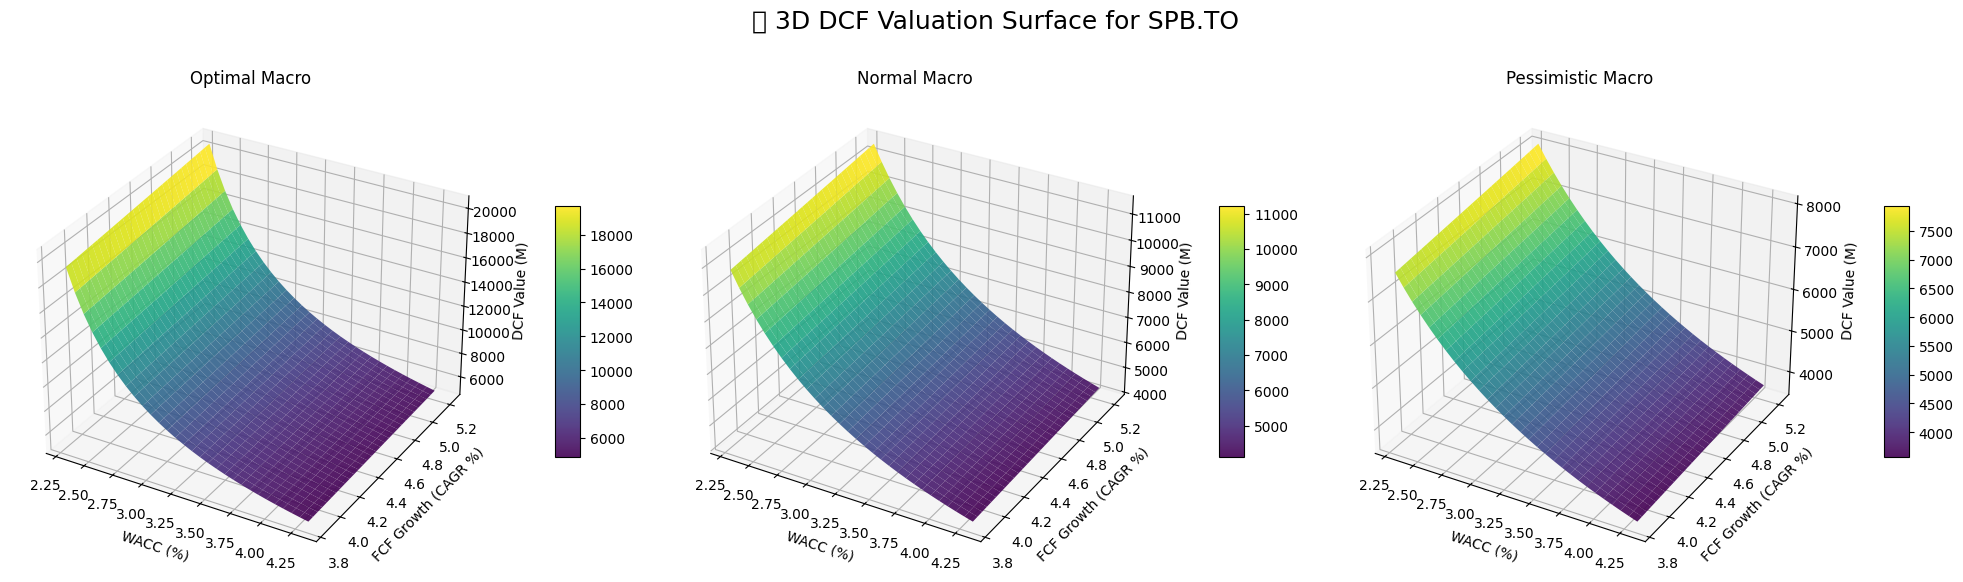

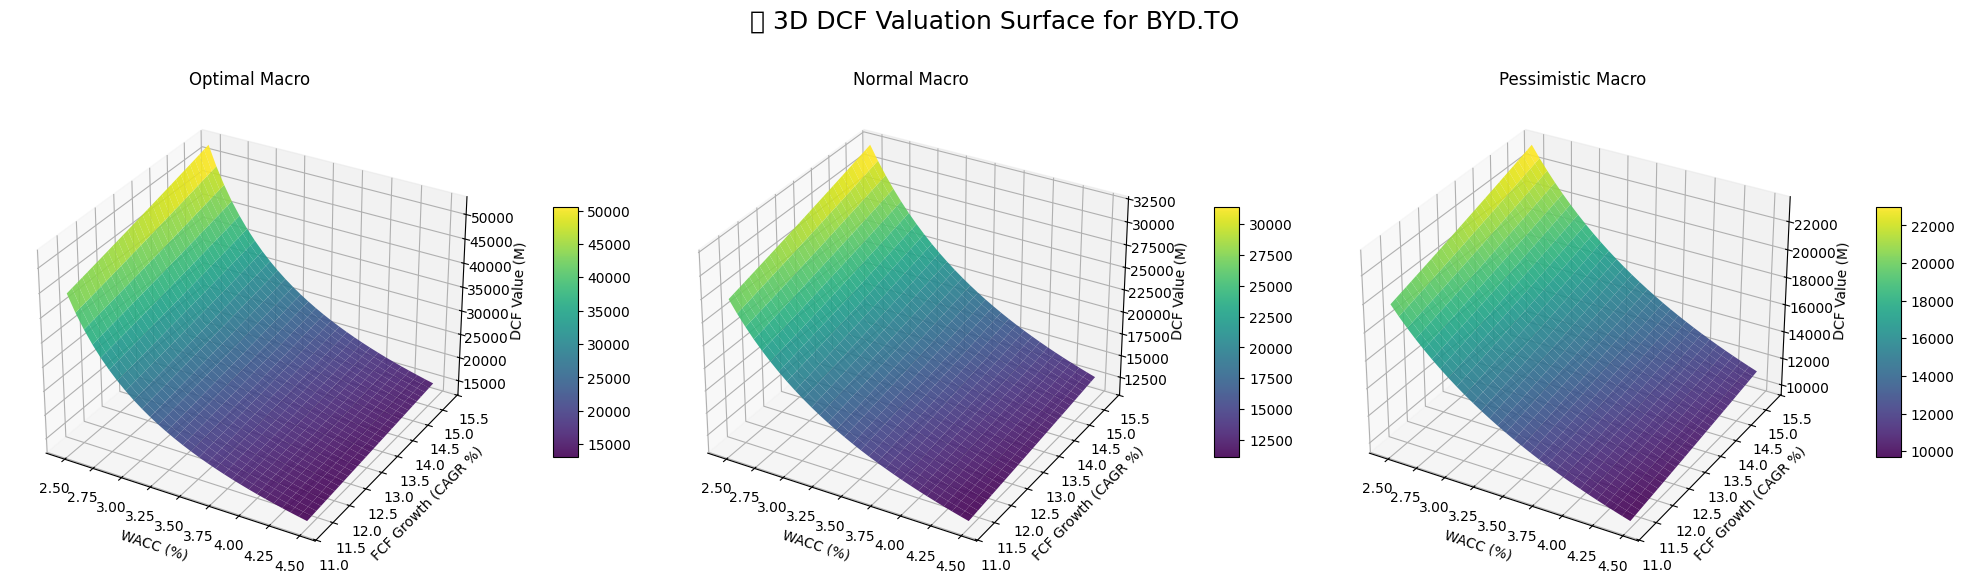

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define number of steps in the grid
wacc_steps = 30
growth_steps = 30

# Create a dictionary of economic scenarios
terminal_growths = {
    "Optimal Macro": float(optimal) / 100,
    "Normal Macro": float(normal) / 100,
    "Pessimistic Macro": float(pessimistic) / 100
}

# Function to compute total DCF value for a given scenario
def run_dcf(fcf, growth, terminal, wacc, years=5):
    try:
        fcf_proj = [fcf * ((1 + growth) ** i) for i in range(1, years + 1)]
        pv_fcf = [fcf_proj[i] / ((1 + wacc) ** (i + 1)) for i in range(years)]
        terminal_val = fcf_proj[-1] * (1 + terminal) / (wacc - terminal)
        pv_terminal = terminal_val / ((1 + wacc) ** years)
        return round(sum(pv_fcf) + pv_terminal, 2)
    except ZeroDivisionError:
        return np.nan

# Loop through tickers in final_table
for _, row in final_table.iterrows():
    ticker = row['Ticker']
    fcf = float(row['Latest FCF (Millions)'])
    base_cagr = float(row['Average Growth Rate (%)']) / 100
    base_wacc = float(row['WACC (%)']) / 100

    # Define WACC and growth ranges around base values
    wacc_range = np.linspace(max(base_wacc - 0.01, 0.001), base_wacc + 0.01, wacc_steps)
    growth_range = np.linspace(base_cagr * 0.85, base_cagr * 1.15, growth_steps)
    WACC_grid, Growth_grid = np.meshgrid(wacc_range, growth_range)

    # Create figure for 3D plots
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(f"📈 3D DCF Valuation Surface for {ticker}", fontsize=18)

    for i, (label, term_growth) in enumerate(terminal_growths.items(), start=1):
        ax = fig.add_subplot(1, len(terminal_growths), i, projection='3d')

        # Compute DCF grid
        Z = np.array([
            [run_dcf(fcf, g, term_growth, w) for w in wacc_range]
            for g in growth_range
        ])

        # Plot the surface
        surf = ax.plot_surface(
            WACC_grid * 100,      # Show in %
            Growth_grid * 100,    # Show in %
            Z,
            cmap='viridis',
            edgecolor='none',
            alpha=0.9
        )

        ax.set_title(label)
        ax.set_xlabel("WACC (%)")
        ax.set_ylabel("FCF Growth (CAGR %)")
        ax.set_zlabel("DCF Value (M)")

        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


⚠️ Valuation Analysis Warning
-----------------------------

We've noted a discrepancy where the **enterprise values** are not correctly updated on Yahoo Finance.

Despite this, our Discounted Cash Flow (DCF) model still indicates that both firms are undervalued.

### Key Observations:

-   ✅ **BYD.TO** is regarded as especially undervalued, despite the fact that its valuation is likely inflated.

-   📈 This inflation is primarily due to the large average **CAGR** (Compound Annual Growth Rate) over the last three years.

-   💡 Even with this consideration, the firm is still regarded as undervalued in our analysis.

### 📈 Stock Metrics Overview

This summary highlights key financial metrics that investors use to assess a company's valuation and profitability. The data is visually coded to quickly signal whether a metric suggests undervaluation, fair value, or potential risk.

* * * * *

### 📊 Valuation Ratios

These ratios help determine if a stock is overvalued, undervalued, or fairly priced relative to its earnings and assets.

-   **Forward PE (Price-to-Earnings):**\
    Reflects the stock price relative to expected future earnings.

    -   🟢 Below 10: Potentially undervalued

    -   🟡 10 to 25: Typical range

    -   🔴 Above 25: Potentially overvalued

-   **Trailing PE:**\
    Based on actual earnings from the past year, providing a historical valuation snapshot.

    -   Same benchmarks as Forward PE apply.

-   **Price to Book (P/B):**\
    Compares stock price to net asset value per share.

    -   🟢 Below 1: Potential undervaluation

    -   🟡 Between 1 and 3: Normal valuation

    -   🔴 Above 3: Possible overvaluation

* * * * *

### 💰 Profitability Ratios

These metrics gauge how effectively a company generates profits from its resources.

-   **Return on Equity (ROE):**\
    Measures profitability relative to shareholder investment.

    -   🟢 Above 15%: Efficient use of equity

    -   🟡 5--15%: Moderate performance

    -   🔴 Below 5% or negative: Weak profitability

-   **Return on Assets (ROA):**\
    Shows how well assets generate profit.

    -   🟢 Above 5%: Highly efficient

    -   🟡 2--5%: Average

    -   🔴 Below 2% or negative: Inefficient asset use

-   **Profit Margin:**\
    Percent of revenue remaining after all expenses. Higher is better, reflecting strong overall profitability.

-   **Operating Margin:**\
    Profitability from core business operations after operating costs. Higher margins indicate operational efficiency.

-   **Gross Margin:**\
    Revenue left after direct production costs. Indicates pricing power and production efficiency. Negative gross margins are a significant warning sign.

In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
from rich.console import Console
from rich.table import Table
from rich.columns import Columns
from rich.text import Text

console = Console()

tickers = ['SPB.TO', 'BYD.TO']

def to_percent(value):
    if value is None or pd.isna(value):
        return None
    return round(value * 100, 2)

def round_or_nan(value):
    if value is None or pd.isna(value):
        return None
    return round(value, 2)

def color_valuation_ratio(val, lower=10, upper=25):
    if val is None:
        return "N/A"
    if val > upper:
        return f"[red]{val}[/red]"
    elif val < lower:
        return f"[green]{val}[/green]"
    else:
        return f"[yellow]{val}[/yellow]"

def color_pb(val, lower=1, upper=3):
    if val is None:
        return "N/A"
    if val > upper:
        return f"[red]{val}[/red]"
    elif val < lower:
        return f"[green]{val}[/green]"
    else:
        return f"[yellow]{val}[/yellow]"

def color_margin(val):
    if val is None:
        return "N/A"
    if val > 0:
        return f"[green]{val}%[/green]"
    elif val == 0:
        return f"[yellow]{val}%[/yellow]"
    else:
        return f"[red]{val}%[/red]"

tables = []

for t in tickers:
    stock = yf.Ticker(t)
    info = stock.info
    
    forward_pe = round_or_nan(info.get('forwardPE', np.nan))
    trailing_pe = round_or_nan(info.get('trailingPE', np.nan))
    pb_ratio = round_or_nan(info.get('priceToBook', np.nan))
    roe = to_percent(info.get('returnOnEquity', np.nan))
    roa = to_percent(info.get('returnOnAssets', np.nan))
    profit_margin = to_percent(info.get('profitMargins', np.nan))
    operating_margin = to_percent(info.get('operatingMargins', np.nan))
    gross_margin = to_percent(info.get('grossMargins', np.nan))

    table = Table(title=f"📊 Metrics for {t}", title_style="bold magenta", show_lines=True)

    table.add_column("Metric", style="cyan", no_wrap=True)
    table.add_column("Value", style="bold")

    metrics = [
        ("Forward PE", color_valuation_ratio(forward_pe)),
        ("Trailing PE", color_valuation_ratio(trailing_pe)),
        ("Price to Book", color_pb(pb_ratio)),
        ("Return on Equity (ROE)", color_margin(roe)),
        ("Return on Assets (ROA)", color_margin(roa)),
        ("Profit Margin", color_margin(profit_margin)),
        ("Operating Margin", color_margin(operating_margin)),
        ("Gross Margin", color_margin(gross_margin))
    ]

    for metric, value in metrics:
        table.add_row(metric, value)

    tables.append(table)

# Print two tables side by side horizontally
console.print(Columns(tables))


       📊 Metrics for SPB.TO               📊 Metrics for BYD.TO       
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Metric                 ┃ Value  ┃ ┃ Metric                 ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Forward PE             │ 18.62  │ │ Forward PE             │ 37.25  │
├────────────────────────┼────────┤ ├────────────────────────┼────────┤
│ Trailing PE            │ 57.42  │ │ Trailing PE            │ 218.39 │
├────────────────────────┼────────┤ ├────────────────────────┼────────┤
│ Price to Book          │ 1.59   │ │ Price to Book          │ 4.94   │
├────────────────────────┼────────┤ ├────────────────────────┼────────┤
│ Return on Equity (ROE) │ 3.26%  │ │ Return on Equity (ROE) │ 1.63%  │
├────────────────────────┼────────┤ ├────────────────────────┼────────┤
│ Return on Assets (ROA) │ 3.69%  │ │ Return on Assets (ROA) │ 2.61%  │
├────────────────────────┼────────┤ ├────────────────────────┼────────┤
│ Profit Margin          │ 0.98%  │ │ Profit Margin          │ 0.44%  │
├────────────────────────┼────────┤ ├────────────────────────┼────────┤
│ Operating Margin       │ 18.81% │ │ Operating Margin       │ 2.75%  │
├────────────────────────┼────────┤ ├────────────────────────┼────────┤
│ Gross Margin           │ 50.06% │ │ Gross Margin           │ 45.83% │
└────────────────────────┴────────┘ └────────────────────────┴────────┘

# 📊 Company Metrics Analysis Summary

---

## ⚡ SPB.TO (SaskPower) — Utilities / Regulated Utilities
- **📈 Valuation:**  
  - Forward PE: 18.65 🟡 (Moderate)  
  - Trailing PE: 57.5 🔴 (High)  
  - Price to Book: 1.59 🟢 (Reasonable)  
- **💰 Profitability:**  
  - ROE: 3.26% 🔴 (Low)  
  - Profit Margin: 0.98% 🔴 (Low)  
  - Operating Margin: 18.81% 🟢 (Strong)  
- **🏢 Industry Fit:**  
  - Typical regulated utility: stable cash flows, low risk, capital intensive  
  - Modest but steady returns expected  
- **🔮 Outlook:**  
  - Reasonable valuation for sector  
  - Operationally efficient with stable income  

---

## 🚀 BYD.TO (Ballard Power Systems) — Consumer Cyclical / Personal Services (Growth Tech)
- **📈 Valuation:**  
  - Forward PE: 36.88 🔴 (High)  
  - Trailing PE: 216.21 🔴 (Very High)  
  - Price to Book: 4.89 🔴 (High)  
- **💰 Profitability:**  
  - ROE: 1.63% 🔴 (Very Low)  
  - Profit Margin: 0.44% 🔴 (Very Low)  
  - Operating Margin: 2.75% 🔴 (Low)  
- **🏢 Industry Fit:**  
  - Growth-phase tech company investing heavily in R&D  
  - Typical low current profits with high future growth expectations  
- **🔮 Outlook:**  
  - High risk, high reward profile  
  - Market pricing in strong future growth despite weak current profitability  

---

## 📚 Sector Benchmark Overview

| Sector           | Forward PE Range | Typical ROE | Characteristics                         |
|------------------|------------------|-------------|---------------------------------------|
| 🏭 Utilities      | 15 – 20          | 5 – 10%     | Stable, low volatility, modest returns |
| 🛍 Consumer Cyclical | 25 – 40+         | 0 – 10%     | Volatile, growth-focused, reinvestment phase |

---

### 📝 **Key Takeaways**
- 🔌 **SPB.TO** is a classic utility: stable, operationally efficient, modest returns  
- 🚀 **BYD.TO** is a high-growth tech play with very high valuation and current low profitability  
- 📊 Investors should consider sector norms when evaluating these metrics  

---

*Note: The red/yellow/green indicators show how each metric compares to typical benchmarks for these sectors.*


In [46]:
# Compute total DCF values
dcf_summary_df = final_table.copy()
dcf_summary_df['Total DCF Value (M)'] = final_table.apply(
    lambda row: round(dcf_details(
        float(row['Latest FCF (Millions)']),
        float(row['Average Growth Rate (%)']) / 100,
        float(normal) / 100,
        float(row['WACC (%)']) / 100
    )[1], 2), axis=1)

# Display
from tabulate import tabulate
print("\n📋 Summary of Total DCF Valuations (Normal Macro Scenario):")
print(tabulate(dcf_summary_df[['Ticker', 'Total DCF Value (M)']], headers='keys', tablefmt='psql', showindex=False))



📋 Summary of Total DCF Valuations (Normal Macro Scenario):
+----------+-----------------------+
| Ticker   |   Total DCF Value (M) |
|----------+-----------------------|
| SPB.TO   |               6101.81 |
| BYD.TO   |              17056.9  |
+----------+-----------------------+


## 📋 Step 1: Compute Total DCF Enterprise Values (EV)

Using the inputs from our **final_table** — latest free cash flow, growth rate, terminal growth, and WACC — we calculated the **total Discounted Cash Flow (DCF) value** for each ticker assuming the *Normal Macro* scenario. This produces an estimate of the company’s enterprise value (EV) based on projected cash flows.

- For each ticker, we run the `dcf_details` function which returns a detailed breakdown and total DCF value.
- We extract the total DCF value (in millions) and round it.
- This summary is stored in `dcf_summary_df` and displayed with tickers and their total DCF EV.

---

## 📊 Step 2: Calculate Equity Value and Fair Share Price from DCF EV

Next, we combine these DCF EV estimates with company financial data from **Yahoo Finance** to translate enterprise value into **equity value** and **fair share price**:

### What we did:

1. **Fetch financial statements and market info per ticker**:
   - Extract latest balance sheet data, including total debt, capital lease obligations, cash & equivalents, minority interest, preferred securities, and total equity.
   - Retrieve market data such as shares outstanding, current stock price, and market capitalization.

2. **Calculate Net Debt**:
   $$
   \text{Net Debt} = \text{Total Debt} + \text{Capital Lease Obligations} - \text{Cash \& Equivalents}
   $$

3. **Calculate Equity Value** by adjusting the DCF Enterprise Value:
   $$
   \text{Equity Value} = \text{DCF Enterprise Value} - \text{Net Debt} - \text{Minority Interest} - \text{Preferred Securities}
   $$

4. **Calculate Fair Share Price**:
   $$
   \text{Fair Price} = \frac{\text{Equity Value}}{\text{Shares Outstanding}}
   $$

5. **Calculate Upside Potential** (relative to current price):
   $$
   \text{Upside (\%)} = \left( \frac{\text{Fair Price}}{\text{Current Price}} - 1 \right) \times 100
   $$

6. **Aggregate all metrics** into a summary table with proper rounding and formatting.

---

### Why this matters:

- **Enterprise Value** reflects the total value of the company’s operations (debt + equity).
- To estimate the **value attributable to shareholders**, we subtract debts and other claims.
- Comparing the **fair share price** to the current market price helps assess whether the stock is undervalued or overvalued based on our DCF model.
- The **upside %** gives a quantifiable target or expected return for investors.

---

### Output

The resulting table displays for each ticker:

| Ticker | Date | DCF EV (M) | Total Debt (M) | Capital Lease (M) | Cash & Equiv (M) | Net Debt (M) | Minority Interest (M) | Preferred Securities (M) | Equity Value (M) | Market Cap (M) | Current Price | Fair Share Price | Upside (%) |

giving a comprehensive view of valuation vs market metrics.

---

*This step connects intrinsic valuation theory with real market data to guide investment decisions.*


In [47]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate

valuation_summary = []

for _, row in dcf_summary_df.iterrows():
    ticker = row['Ticker']
    dcf_ev_m = row['Total DCF Value (M)']
    dcf_ev = dcf_ev_m * 1e6  # Convert M to absolute

    stock = yf.Ticker(ticker)
    info = stock.info

    # Fetch latest balance sheet
    bs = stock.balance_sheet
    if bs.empty:
        print(f"No balance sheet for {ticker}")
        continue
    latest_year = max(bs.columns)
    data = bs[latest_year].fillna(0)  # Replace all NaNs with 0 here

    # Extract values safely (NaNs replaced by 0)
    total_debt = data.get("Total Debt", 0)
    capital_lease = data.get("Capital Lease Obligations", 0)
    cash = data.get("Cash And Cash Equivalents", 0) or data.get("Cash Cash Equivalents And Short Term Investments", 0)
    minority_interest = data.get("Minority Interest", 0)
    preferred_sec = data.get("Preferred Securities Outside Stock Equity", 0)
    total_equity_gross_minority = data.get("Total Equity Gross Minority Interest", 0)

    # Compute net debt including capital leases
    net_debt = total_debt + capital_lease - cash

    # Compute equity value subtracting net debt, minority interest and preferred securities
    equity_value = dcf_ev - net_debt - minority_interest - preferred_sec

    # Market data from info
    shares = info.get("sharesOutstanding", None)
    price = info.get("currentPrice", None)
    mcap = info.get("marketCap", None)

    fair_price = (equity_value / shares) if equity_value is not None and shares else None
    upside = ((fair_price / price - 1) * 100) if fair_price and price else None

    valuation_summary.append({
        "Ticker": ticker,
        "Date": latest_year.date(),
        "DCF EV (M)": round(dcf_ev_m, 2),
        "Total Debt (M)": round(total_debt / 1e6, 2),
        "Capital Lease Obligations (M)": round(capital_lease / 1e6, 2),
        "Cash & Equiv (M)": round(cash / 1e6, 2),
        "Net Debt (M)": round(net_debt / 1e6, 2),
        "Minority Interest (M)": round(minority_interest / 1e6, 2),
        "Preferred Securities (M)": round(preferred_sec / 1e6, 2),
        "Total Equity Gross Minority Interest (M)": round(total_equity_gross_minority / 1e6, 2),
        "Equity Value (M)": round(equity_value / 1e6, 2),
        "Market Cap (M)": round(mcap / 1e6, 2) if mcap else None,
        "Current Price": price,
        "Fair Share Price": round(fair_price, 2) if fair_price else None,
        "Upside (%)": round(upside, 2) if upside else None
    })

df = pd.DataFrame(valuation_summary)

print("\n📊 DCF EV-Based Equity Valuation Summary:")
print(tabulate(df, headers="keys", tablefmt="psql", showindex=False))



📊 DCF EV-Based Equity Valuation Summary:
+----------+------------+--------------+------------------+---------------------------------+--------------------+----------------+-------------------------+----------------------------+--------------------------------------------+--------------------+------------------+-----------------+--------------------+--------------+
| Ticker   | Date       |   DCF EV (M) |   Total Debt (M) |   Capital Lease Obligations (M) |   Cash & Equiv (M) |   Net Debt (M) |   Minority Interest (M) |   Preferred Securities (M) |   Total Equity Gross Minority Interest (M) |   Equity Value (M) |   Market Cap (M) |   Current Price |   Fair Share Price |   Upside (%) |
|----------+------------+--------------+------------------+---------------------------------+--------------------+----------------+-------------------------+----------------------------+--------------------------------------------+--------------------+------------------+-----------------+-----------------

In [ ]:
# Assuming 'df' has a 'Date' column (datetime or string) along with other columns

# Define upside multipliers for targets
targets = {
    "Conservative Target (20%)": 1.20,
    "Moderate Target (25%)": 1.25,
    "Aggressive Target (30%+)": 1.30,
}

# Compute target prices based on current price
for target_name, multiplier in targets.items():
    df[target_name] = df["Current Price"] * multiplier

# Format prices nicely as strings with $ and 2 decimals for Markdown table
def fmt_price(x):
    if pd.isna(x):
        return "N/A"
    return f"${x:.2f}"

df_display = df.copy()

# Format the date nicely (optional, e.g. YYYY-MM-DD)
df_display['Date'] = pd.to_datetime(df_display['Date']).dt.strftime('%Y-%m-%d')

df_display["Current Price"] = df_display["Current Price"].apply(fmt_price)
df_display["Fair Share Price"] = df_display["Fair Share Price"].apply(fmt_price)
for target_name in targets.keys():
    df_display[target_name] = df_display[target_name].apply(fmt_price)

# Select columns to display, adding Date
md_table = df_display[[
    "Ticker",
    "Date",
    "Current Price",
    "Fair Share Price",
    "Conservative Target (20%)",
    "Moderate Target (25%)",
    "Aggressive Target (30%+)"
]]

print("\n### 📊 Price Targets Table with Dates\n")
print(md_table.to_markdown(index=False))


## 📊 Price Targets and Investment Guidance

Based on our DCF valuation and latest market data, here are the entry and exit price targets for each equity:

| Ticker | 🔖 Current Price | 💎 Fair Share Price | 🛡️ Conservative Target (20%) | 🚀 Moderate Target (25%) | 🌟 Aggressive Target (30%+) |
|:-------|:-----------------|:--------------------|:-----------------------------|:------------------------|:----------------------------|
| SPB.TO | **$6.89**        | $16.59              | $8.27                        | $8.61                   | $8.96                       |
| BYD.TO | **$190.00**      | $705.92             | $228.00                      | $237.50                 | $247.00                     |

---

### Explanation of columns:

- 🔖 **Current Price:** The latest market price at which the stock is trading.  
- 💎 **Fair Share Price:** Our estimate of intrinsic value per share based on discounted cash flow and adjusted balance sheet metrics.  
- 🛡️ **Conservative Target (20%):** A prudent exit level for risk-averse investors to lock in gains.  
- 🚀 **Moderate Target (25%):** A balanced target for investors comfortable with moderate risk seeking higher returns.  
- 🌟 **Aggressive Target (30%+):** A higher reward target for those willing to hold longer and accept more volatility, especially promising for BYD.

---

### 📈 Investment Summary

- Both stocks are currently trading **well below** their fair share prices, signaling undervaluation and an attractive buying opportunity.  
- Conservative investors should consider exiting at around a **20% gain** to secure profits without excessive risk.  
- More aggressive investors may target **25% to**
